In [7]:
from fit import TrainingConfigurator
from utils.evaluation import HeatMaps, Scores, VisualizeEmbeddings
from utils.utils import load_image, prepare_tensor_from_image
from sklearn.neighbors import NearestNeighbors
import os
import matplotlib.pyplot as plt
import yaml
import numpy as np
import pandas as pd
from config import CHECKPOINTS_DIR, DATA_DIR, TEST_DIR
import seaborn as sns
from tqdm import tqdm
import keras.backend as K
from utils.performance_utils import perf_biometric_proba
from collections import OrderedDict
K.set_learning_phase(1)
sns.set_palette(sns.color_palette("hls", 15))

In [2]:
LR = 0.0001

In [3]:
# !python3 fit.py -lr {LR} -mn xception_l2

Using TensorFlow backend.
2019-02-04 09:29:55.082048: I tensorflow/core/platform/cpu_feature_guard.cc:141] Your CPU supports instructions that this TensorFlow binary was not compiled to use: AVX2 FMA
2019-02-04 09:29:55.139036: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:897] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2019-02-04 09:29:55.139430: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1405] Found device 0 with properties: 
name: Tesla K80 major: 3 minor: 7 memoryClockRate(GHz): 0.8235
pciBusID: 0000:00:1e.0
totalMemory: 11.17GiB freeMemory: 11.00GiB
2019-02-04 09:29:55.139458: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1484] Adding visible gpu devices: 0
2019-02-04 09:29:55.444349: I tensorflow/core/common_runtime/gpu/gpu_device.cc:965] Device interconnect StreamExecutor with strength 1 edge matrix:
2019-02-04 09:29:55.444399: I tensorflow/core/common_runtime/gpu/gpu_d

No file with weights available! Starting from scratch...
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
ImageA_Input (InputLayer)       (None, 384, 384, 3)  0                                            
__________________________________________________________________________________________________
ImageP_Input (InputLayer)       (None, 384, 384, 3)  0                                            
__________________________________________________________________________________________________
ImageN_Input (InputLayer)       (None, 384, 384, 3)  0                                            
__________________________________________________________________________________________________
encoder (Model)                 (None, 2048)         20861480    ImageA_Input[0][0]               
                                                    

100/100 [==============================] - 4956s 50s/step - loss: 0.0900 - _triplet_acc: 0.9717 - _triplet_acc_1: 0.5867 - val_loss: 0.0438 - val__triplet_acc: 0.9745 - val__triplet_acc_1: 0.8510

Epoch 00014: val_loss improved from 0.04401 to 0.04383, saving model to data/checkpnts/20190204092955/20190204092955.weights.hdf5
Epoch 15/50
100/100 [==============================] - 6160s 62s/step - loss: 0.1178 - _triplet_acc: 0.9467 - _triplet_acc_1: 0.5350 - val_loss: 0.0433 - val__triplet_acc: 0.9750 - val__triplet_acc_1: 0.8515

Epoch 00015: val_loss improved from 0.04383 to 0.04332, saving model to data/checkpnts/20190204092955/20190204092955.weights.hdf5
Epoch 16/50
100/100 [==============================] - 5513s 55s/step - loss: 0.1167 - _triplet_acc: 0.9567 - _triplet_acc_1: 0.5383 - val_loss: 0.0432 - val__triplet_acc: 0.9752 - val__triplet_acc_1: 0.8528

Epoch 00016: val_loss improved from 0.04332 to 0.04317, saving model to data/checkpnts/20190204092955/20190204092955.weights.

In [ ]:
!python3 fit.py -lr {LR} -mn xception_l2


Using TensorFlow backend.
2019-02-09 22:31:38.785890: I tensorflow/core/platform/cpu_feature_guard.cc:141] Your CPU supports instructions that this TensorFlow binary was not compiled to use: AVX2 FMA
2019-02-09 22:31:38.850933: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:897] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2019-02-09 22:31:38.851391: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1405] Found device 0 with properties: 
name: Tesla K80 major: 3 minor: 7 memoryClockRate(GHz): 0.8235
pciBusID: 0000:00:1e.0
totalMemory: 11.17GiB freeMemory: 10.89GiB
2019-02-09 22:31:38.851423: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1484] Adding visible gpu devices: 0
2019-02-09 22:31:39.158012: I tensorflow/core/common_runtime/gpu/gpu_device.cc:965] Device interconnect StreamExecutor with strength 1 edge matrix:
2019-02-09 22:31:39.158062: I tensorflow/core/common_runtime/gpu/gpu_d

No file with weights available! Starting from scratch...
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
ImageA_Input (InputLayer)       (None, 320, 320, 3)  0                                            
__________________________________________________________________________________________________
ImageP_Input (InputLayer)       (None, 320, 320, 3)  0                                            
__________________________________________________________________________________________________
ImageN_Input (InputLayer)       (None, 320, 320, 3)  0                                            
__________________________________________________________________________________________________
encoder (Model)                 (None, 2048)         20861480    ImageA_Input[0][0]               
                                                    

Epoch 14/50
100/100 [==============================] - 24722s 247s/step - loss: 0.1017 - _triplet_acc: 0.9575 - _triplet_acc_1: 0.6250 - val_loss: 0.0448 - val__triplet_acc: 0.9709 - val__triplet_acc_1: 0.8520

Epoch 00014: val_loss improved from 0.04487 to 0.04480, saving model to data/checkpnts/20190209223139/20190209223139.weights.hdf5

Epoch 00014: ReduceLROnPlateau reducing learning rate to 7.999999979801942e-07.
Epoch 15/50
100/100 [==============================] - 25390s 254s/step - loss: 0.0838 - _triplet_acc: 0.9637 - _triplet_acc_1: 0.6663 - val_loss: 0.0448 - val__triplet_acc: 0.9709 - val__triplet_acc_1: 0.8519

Epoch 00015: val_loss did not improve from 0.04480

Epoch 00015: ReduceLROnPlateau reducing learning rate to 1.600000018697756e-07.
Epoch 16/50
100/100 [==============================] - 24516s 245s/step - loss: 0.0927 - _triplet_acc: 0.9675 - _triplet_acc_1: 0.6200 - val_loss: 0.0448 - val__triplet_acc: 0.9710 - val__triplet_acc_1: 0.8519

Epoch 00016: val_loss di

In [2]:
# TIMESTAMP = '20190204092955' # Xception v2 ~40%
TIMESTAMP = '20190124115107'  # VGG19 ~40%
# TIMESTAMP = '20190130230939'  # Xception ~31%
# TIMESTAMP = '20190209223139'   # Xception v3 ~

with open(os.path.join(CHECKPOINTS_DIR, TIMESTAMP, 'config_{}.yml'.format(TIMESTAMP)), 'r') as cfg_file:
    conf = yaml.load(cfg_file)
train_conf = TrainingConfigurator(conf)



_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 320, 320, 3)       0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 320, 320, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 320, 320, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 160, 160, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 160, 160, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 160, 160, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 80, 80, 128)       0         
__________

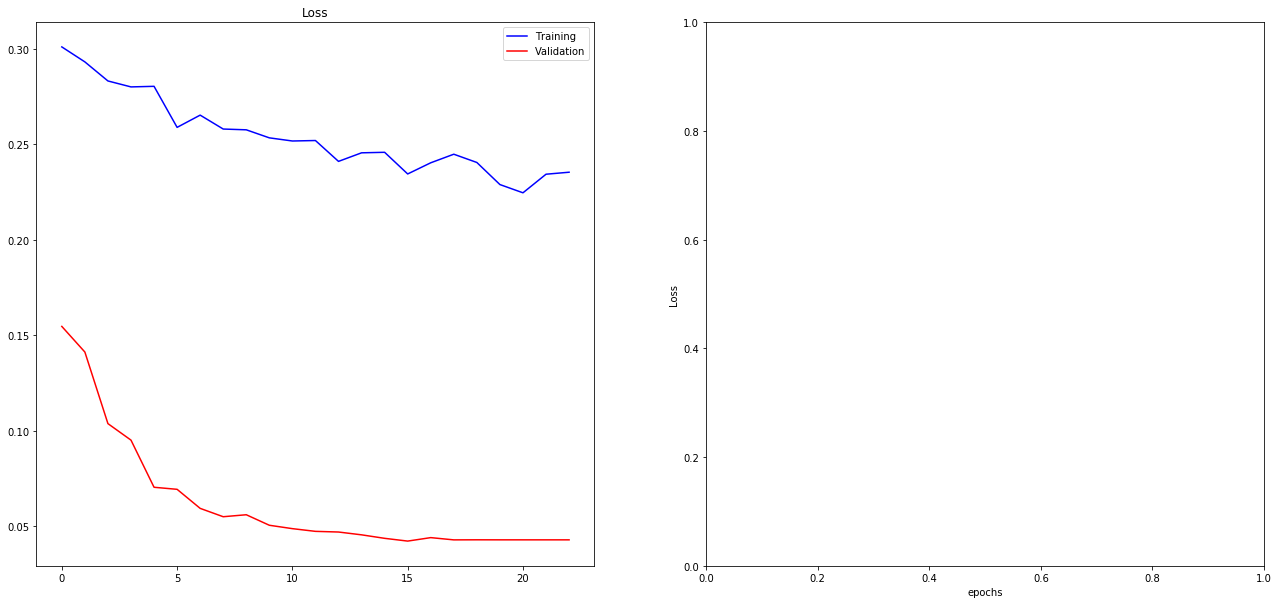

In [3]:
train_conf.show_loss(acc=False)

### Visualization of embeddings

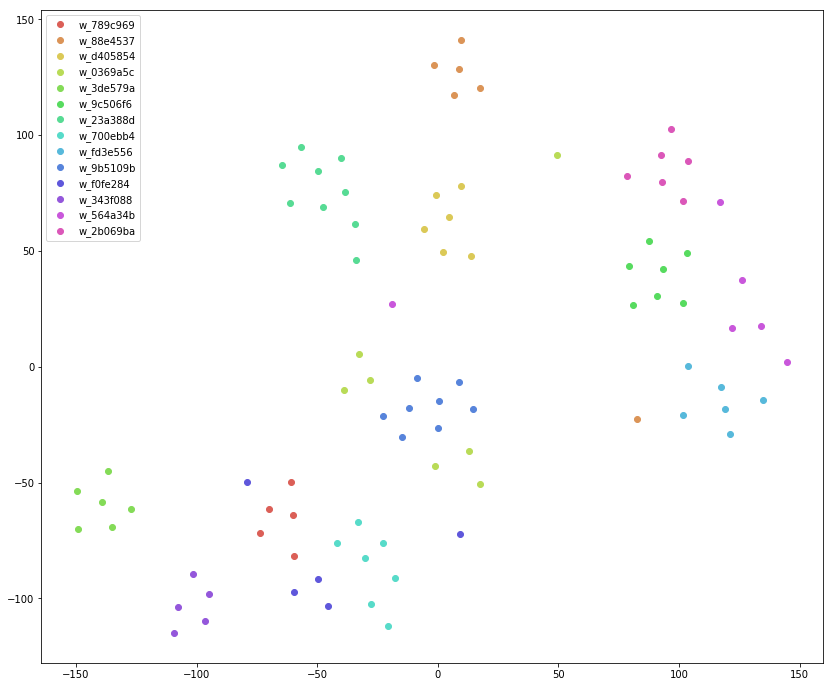

In [4]:
visual_embedd_top = VisualizeEmbeddings(train_conf)
visual_embedd_top.visualize(tsne_perplexity=15)


### Visualization of what NN has learnt

In [8]:
positive_scores_top_list, negative_scores_top_list = [], []

evaluation = Scores(train_conf)
positive_scores, negative_scores = evaluation.get_normalized_scores(clip_negative=20000)


  0%|          | 2/550 [00:00<00:40, 13.44it/s]

550
20000


100%|██████████| 20000/20000 [25:22<00:00, 13.14it/s]


550
20000


EER theory 3.74%
EER 6.15%
min HTER 5.75%
threshold at EER 0.4532
threshold at min HTER 0.4480


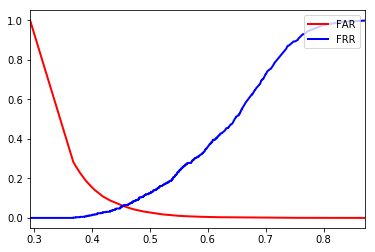

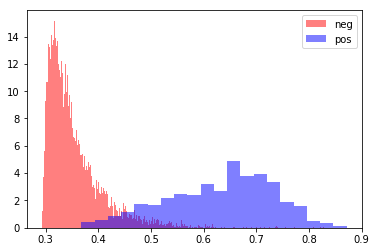

In [9]:
perf = perf_biometric_proba(np.array([row[0] for row in negative_scores]),
                                np.array([row[0] for row in positive_scores]))
perf.fit()
perf.plot_far_frr()
perf.plot_hist()
perf.print_metrics()
    
THRESHOLD = perf.get_metrics()['eer_thrd'] 
DISTANCE_THRESHOLD = 2 - 2*THRESHOLD


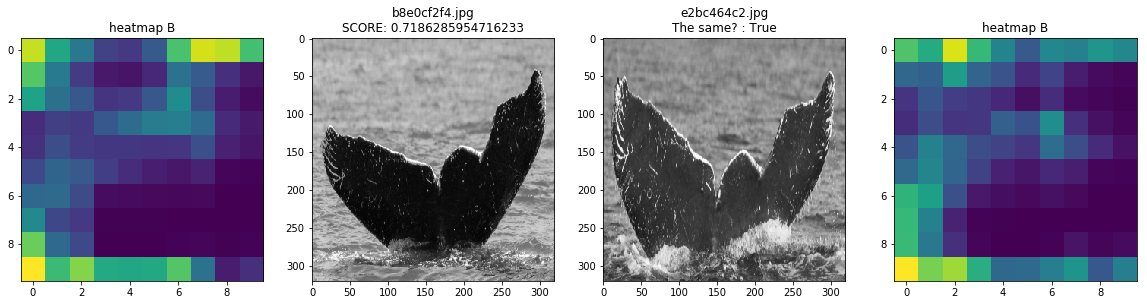

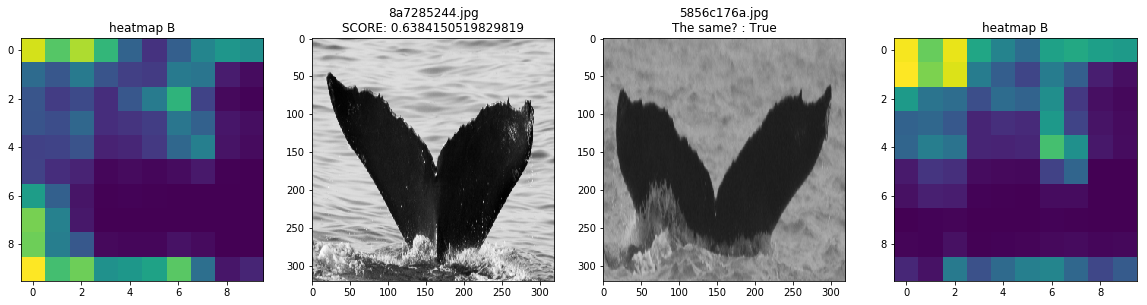

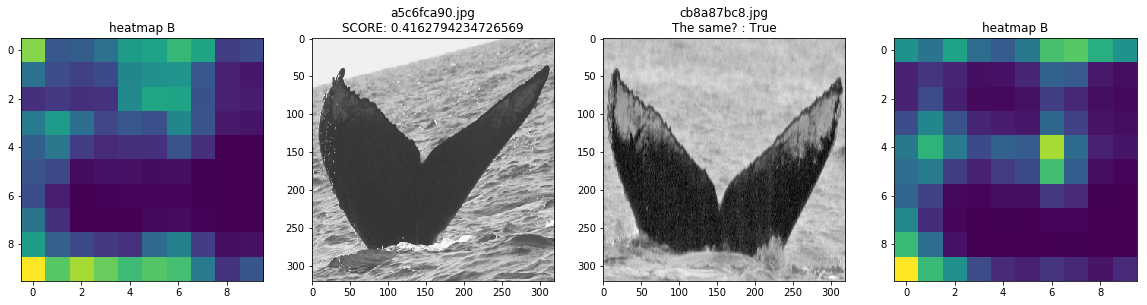

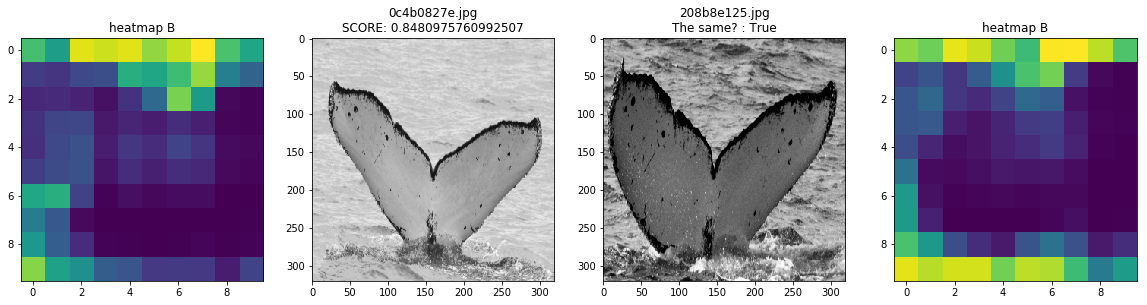

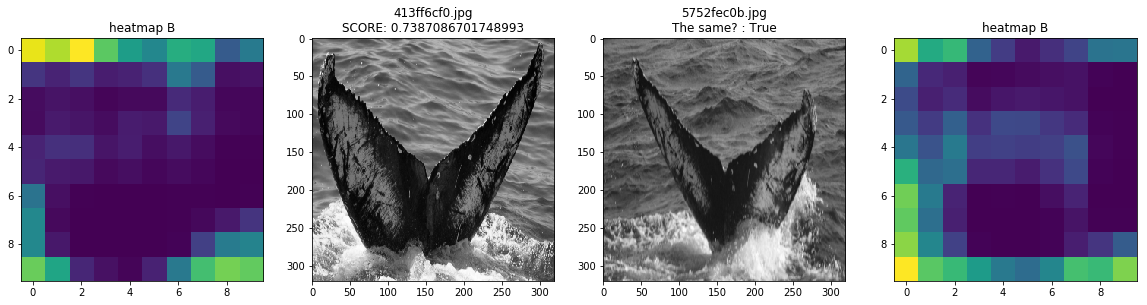

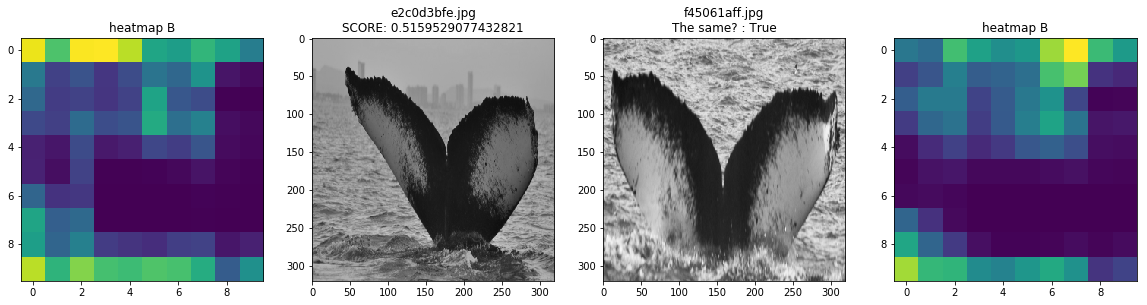

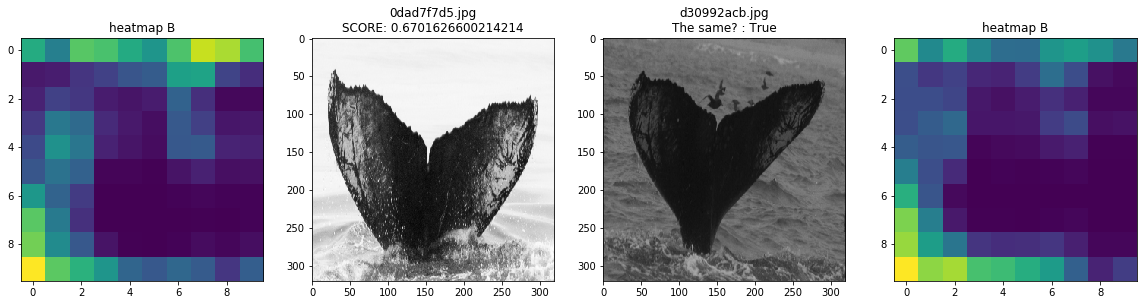

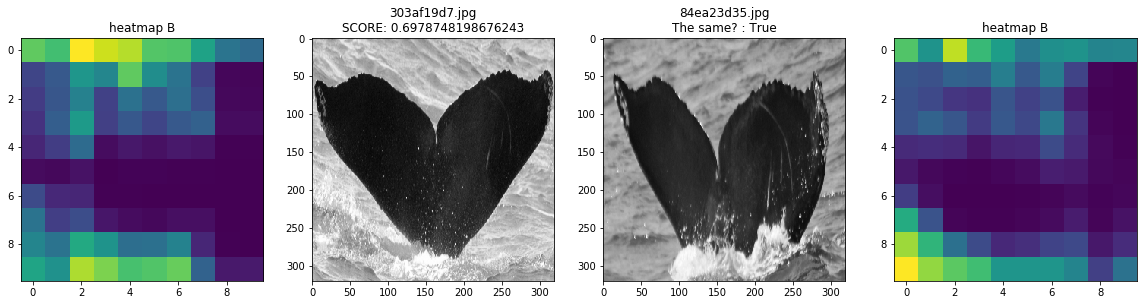

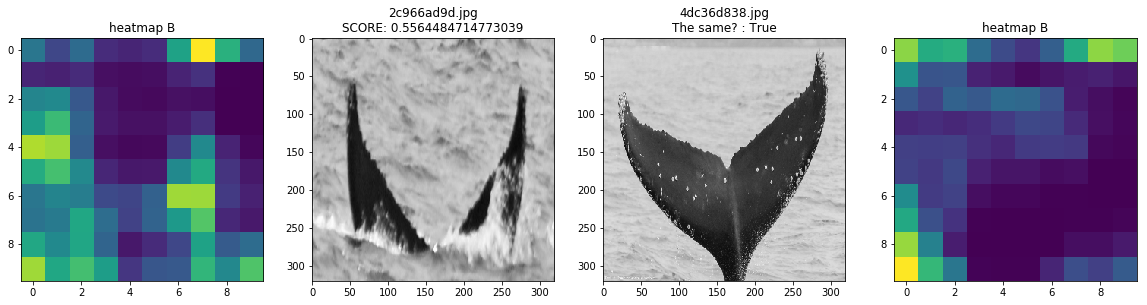

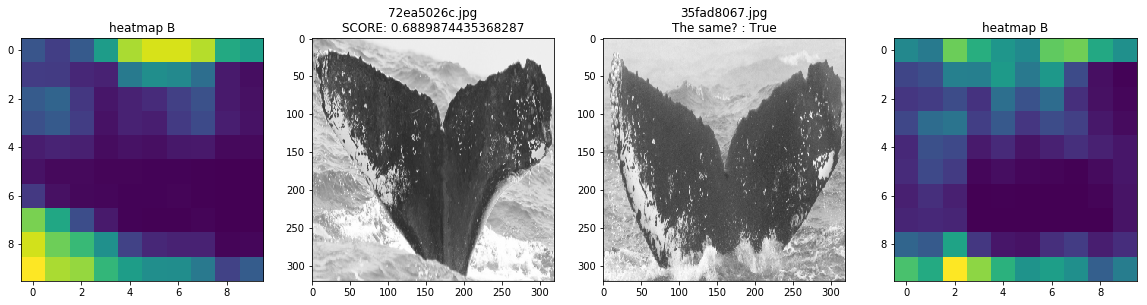

In [10]:
# positive pairs
h_maps = HeatMaps(train_conf)
h_maps.show_visualizations(positive_scores,                    
                           number_of_samples=10)

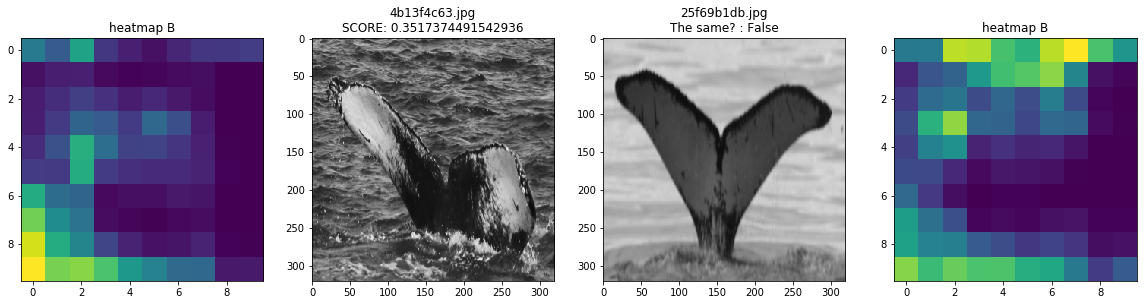

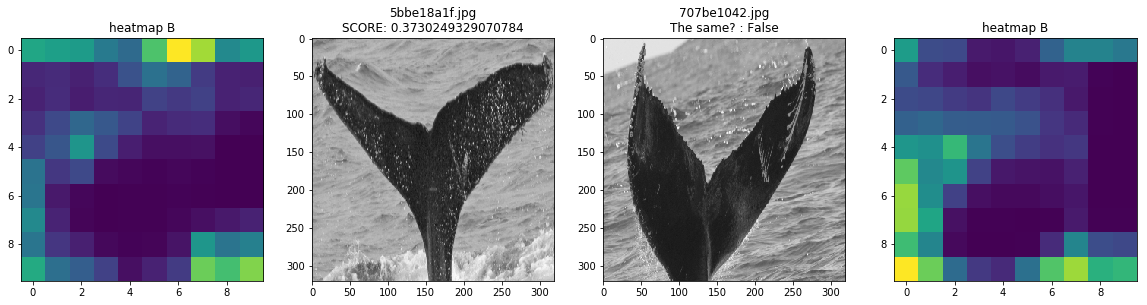

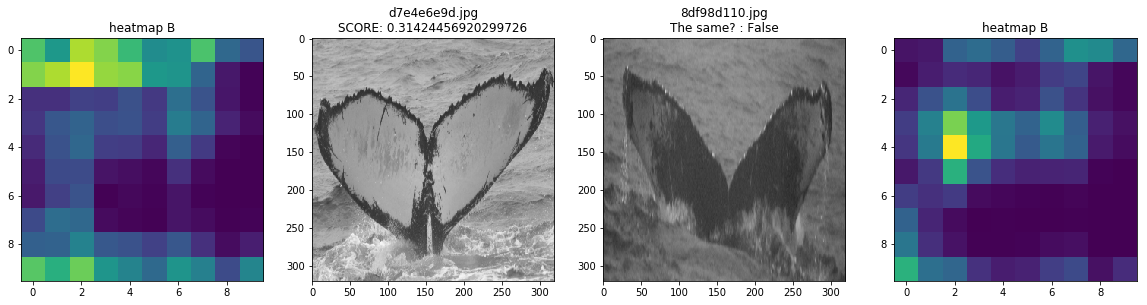

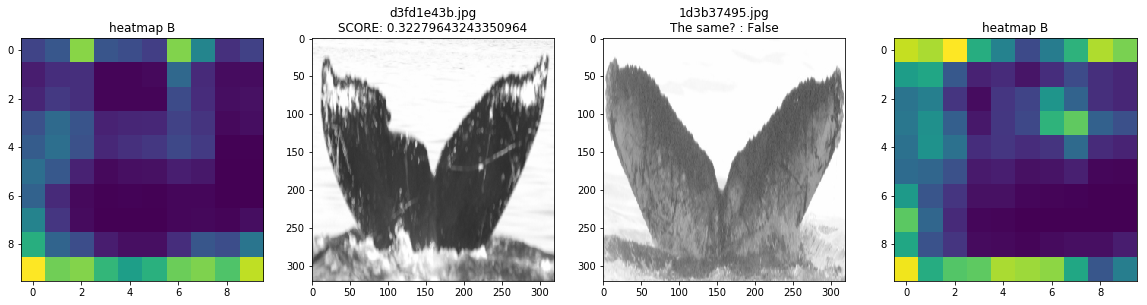

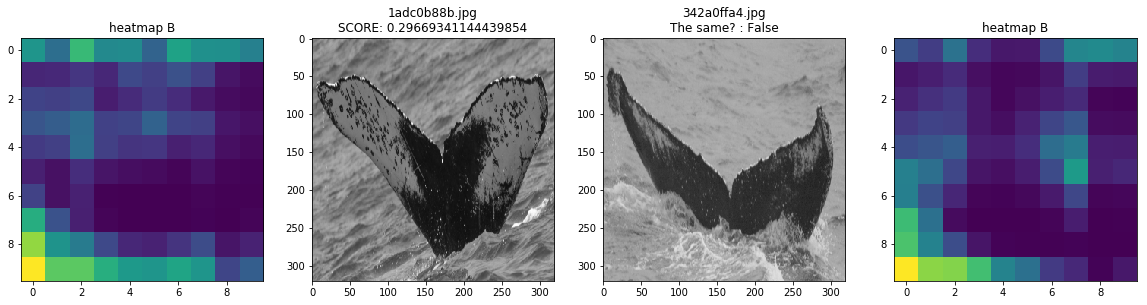

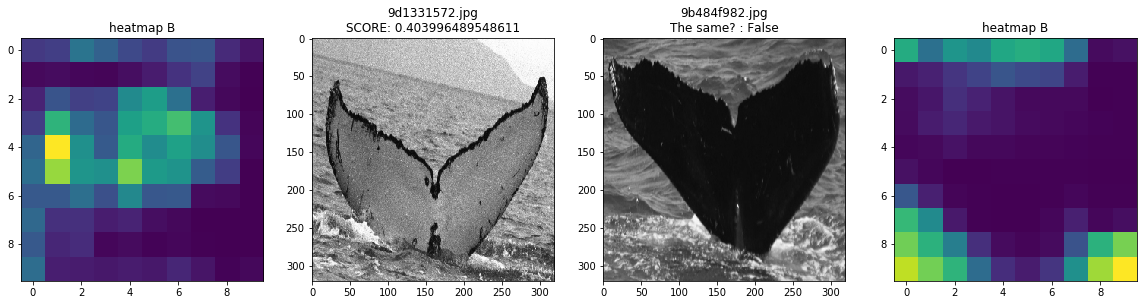

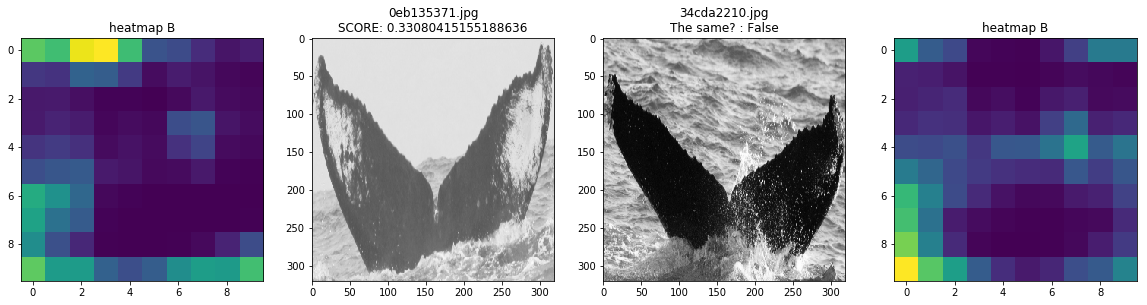

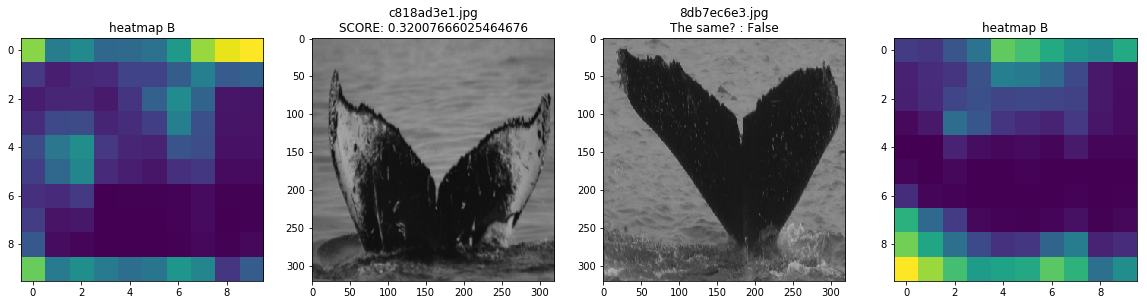

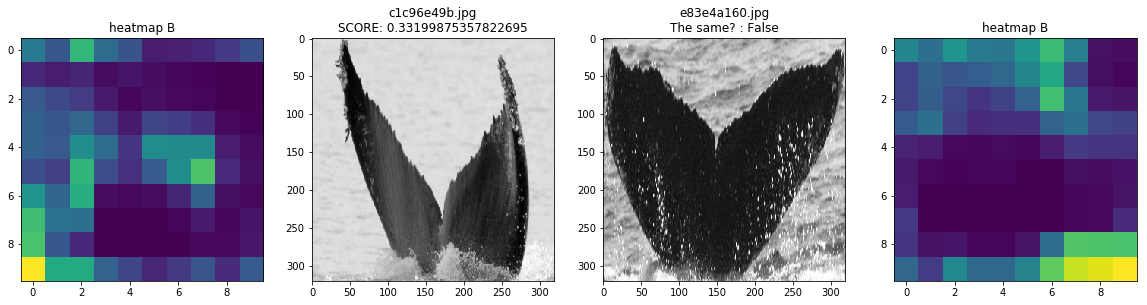

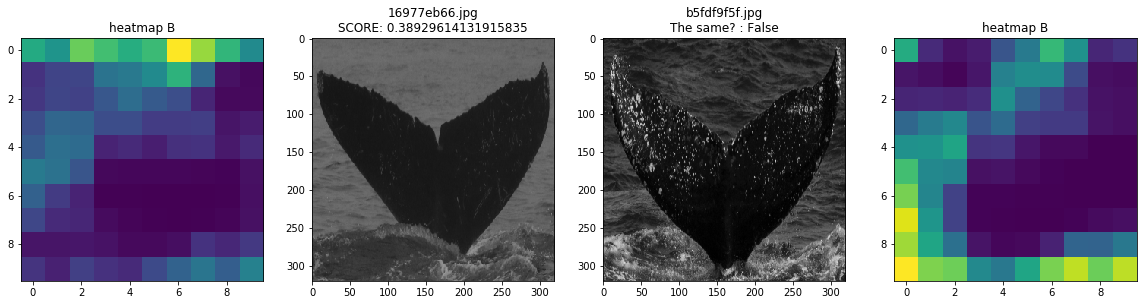

In [11]:
# Negative pairs
h_maps = HeatMaps(train_conf)
h_maps.show_visualizations(negative_scores,                    
                           number_of_samples=10)

### Evaluate (MAP5) on validation dataset

In [10]:
def map_per_image(label, predictions):
    try:
        return 1 / (predictions[:5].index(label) + 1)
    except ValueError:
        return 0.0

def map_per_set(labels, predictions):
    return np.mean([map_per_image(l, p) for l,p in zip(labels, predictions)])

In [11]:
train_df = pd.read_csv(os.path.join('data', 'train_all.csv'))
train_df = train_df[train_df['Id'] != 'new_whale']

train_imgs = []
for img_name, whale_id in tqdm(train_df.values):
    img = load_image(img_name, input_shape=train_conf.input_shape, mode='train')
    train_imgs.append(img)
    
tensor = np.stack(train_imgs)    
embeddings_train = train_conf.encoder.predict(tensor)



  2%|▏         | 304/14575 [00:24<19:26, 12.23it/s]


  5%|▌         | 775/14575 [00:43<12:56, 17.77it/s]


  8%|▊         | 1139/14575 [01:06<13:04, 17.13it/s]


 10%|▉         | 1439/14575 [01:30<13:45, 15.90it/s]


 12%|█▏        | 1741/14575 [01:54<14:01, 15.26it/s]


 14%|█▍        | 2046/14575 [02:17<14:04, 14.84it/s]


 16%|█▌        | 2346/14575 [02:42<14:07, 14.43it/s]


 18%|█▊        | 2651/14575 [03:06<13:58, 14.21it/s]


 21%|██        | 3019/14575 [03:28<13:17, 14.49it/s]


 23%|██▎       | 3321/14575 [03:52<13:07, 14.29it/s]


 25%|██▍       | 3628/14575 [04:16<12:54, 14.14it/s]


 27%|██▋       | 3932/14575 [04:41<12:41, 13.98it/s]


 30%|██▉       | 4302/14575 [05:03<12:05, 14.16it/s]


 32%|███▏      | 4612/14575 [05:28<11:49, 14.04it/s]


 34%|███▎      | 4917/14575 [05:52<11:33, 13.93it/s]


 36%|███▋      | 5303/14575 [06:14<10:54, 14.16it/s]


 39%|███▊      | 5634/14575 [06:34<10:26, 14.28it/s]


 41%|████      | 5960/14575 [06:55<10:00, 14.36it/s]


 43%|████▎     | 6276/14575 [07:14<09:35, 14.43it/s]


 45%|████▌     | 6601/14575 [07:35<09:10, 14.50it/s]


 48%|████▊     | 6933/14575 [07:56<08:44, 14.56it/s]


 50%|████▉     | 7258/14575 [08:16<08:20, 14.61it/s]


 52%|█████▏    | 7594/14575 [08:37<07:55, 14.68it/s]


 54%|█████▍    | 7916/14575 [08:57<07:32, 14.72it/s]


 57%|█████▋    | 8239/14575 [09:18<07:09, 14.76it/s]


 59%|█████▉    | 8565/14575 [09:38<06:45, 14.81it/s]


 61%|██████    | 8901/14575 [09:58<06:21, 14.88it/s]


 64%|██████▍   | 9315/14575 [10:17<05:48, 15.09it/s]


 67%|██████▋   | 9813/14575 [10:35<05:08, 15.43it/s]


 71%|███████   | 10310/14575 [10:54<04:30, 15.76it/s]


 74%|███████▍  | 10784/14575 [11:12<03:56, 16.03it/s]


 77%|███████▋  | 11260/14575 [11:31<03:23, 16.29it/s]


 81%|████████  | 11747/14575 [11:49<02:50, 16.56it/s]


 83%|████████▎ | 12151/14575 [12:10<02:25, 16.63it/s]


 85%|████████▌ | 12455/14575 [12:33<02:08, 16.52it/s]


 87%|████████▋ | 12749/14575 [12:56<01:51, 16.41it/s]


 90%|████████▉ | 13049/14575 [13:19<01:33, 16.31it/s]


 92%|█████████▏| 13343/14575 [13:44<01:16, 16.19it/s]


 94%|█████████▎| 13634/14575 [14:08<00:58, 16.08it/s]


 96%|█████████▌| 13933/14575 [14:31<00:40, 15.98it/s]


 98%|█████████▊| 14245/14575 [14:55<00:20, 15.91it/s]


100%|██████████| 14575/14575 [15:09<00:00, 16.03it/s]

KeyboardInterrupt: 

In [ ]:
validation_df = pd.read_csv(os.path.join('data', 'validation_all.csv'))
validation_df = validation_df[validation_df['Id'] != 'new_whale']

labels = []
validation_imgs = []
for img_name, whale_id in tqdm(validation_df.values):
    img = load_image(img_name, input_shape=train_conf.input_shape, mode='train')
    validation_imgs.append(img)
    labels.append(whale_id)
    
tensor = np.stack(validation_imgs)    
embeddings_validation = train_conf.encoder.predict(tensor)


In [ ]:
neigh = NearestNeighbors(n_neighbors=50, metric='minkowski', p=2)
neigh.fit(embeddings_train)
distances_test, neighbors_validation = neigh.kneighbors(embeddings_validation)

In [ ]:
validation_predictions = []
for i in tqdm(range(validation_df.shape[0])): 
    predictions = [train_df.iloc[neighbors_validation[i][k]][1] for k in range(50)]
    predictions = list(OrderedDict.fromkeys(predictions))[:5]       
    validation_predictions.append(predictions)
        

In [12]:
score = map_per_set(labels, validation_predictions)
print("Validation MAP5: ", score)

NameError: name 'labels' is not defined

In [25]:
r = pd.read_csv('submissions/submission_siamese_kernel.csv')
r = [el.split(" ")[0] for el in list(r['Id'])]
r.count("new_whale")/len(r)

0.4243718592964824

### Prepare submission

In [ ]:
train_all_df = pd.read_csv(os.path.join('data', 'train.csv'))
train_all_df = train_all_df[train_all_df['Id'] != 'new_whale']

train_imgs = []
for img_name, whale_id in tqdm(train_all_df.values):
    img = load_image(img_name, input_shape=train_conf.input_shape, mode='train')
    train_imgs.append(img)
    
tensor = np.stack(train_imgs)    
embeddings_train_all = train_conf.encoder.predict(tensor)


100%|██████████| 15697/15697 [09:59<00:00, 26.18it/s]


In [ ]:
images_names = []

test_imgs = []
for img_name in tqdm(os.listdir(TEST_DIR)):
    img = load_image(img_name, input_shape=train_conf.input_shape, mode='test')
    test_imgs.append(img)
    images_names.append(img_name)
    
tensor = np.stack(test_imgs) 
embeddings_test = train_conf.encoder.predict(tensor)


In [39]:
# from scipy.spatial.distance import cdist

# distances_all = cdist(embeddings_test, embeddings_train, metric='euclidean')

In [ ]:
neigh = NearestNeighbors(n_neighbors=50, metric='minkowski', p=2)
neigh.fit(embeddings_train_all)
distances_test, neighbors_test = neigh.kneighbors(embeddings_test)

In [41]:
# distances_all.shape
# similarity_all = (2 - distances_all)/2

In [42]:
# similarity_all

In [43]:
# THRESHOLD

In [44]:
# distances_test

In [45]:
# distances_test_first = np.array([i[0] for i in distances_test])
# distances_test_first.shape, distances_test.shape

In [46]:
# number_of_new_whales = round(distances_test.shape[0]*0.276)
# number_of_new_whales

In [47]:
# new_whale_indexes = np.argwhere(distances_test_first>0.7783)
# neighbors_test_tmp = neighbors_test.copy()
# new_whale_indexes.shape

In [48]:
# new_whale_indexes


In [ ]:
submission = {}
for i in range(len(os.listdir(TEST_DIR))):  
    img_name = images_names[i]
    predictions = [train_all_df.iloc[neighbors_test[i][k]][1] for k in range(50)]
#     if i not in new_whale_indexes:
    predictions = list(OrderedDict.fromkeys(predictions))[:5]       
    predictions = " ".join(predictions)
#     else:
#         predictions = list(OrderedDict.fromkeys(predictions))[:4]       
#         predictions = "new_whale" + " " + " ".join(predictions)
    submission[img_name] = predictions
    

In [50]:
# Add threshold for new_whales


In [ ]:
df = pd.read_csv('data/sample_submission.csv')
df['Id'] = ''
for image_name, _ in df.values:
    df.Id[df.Image == image_name] = submission[image_name]
    
df.head()

In [52]:
# 1. Use theshold for new_whales (under some distance do not use this class)
# 2. Include number of occurancies in KNN (in some way), instead of only positions
# 3. 

In [ ]:
df.to_csv('submissions/submission_xception_bboxes_no_new_whales.csv', index=False)